<h1>Stochastic Gradient Descent</h1>

<h4>Attempting to find find patterns in gym traffic at every time using the following dataset </h4> <a>https://www.kaggle.com/datasets/nsrose7224/crowdedness-at-the-campus-gym</a>

In [7]:
import pandas as pd 
import seaborn as sns

In [8]:
ds = pd.read_csv("crowdness_gym_data.csv")
ds.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


<h3> There are no null rows, and data is mainly integers, next is finding correlations </h3>


<AxesSubplot:>

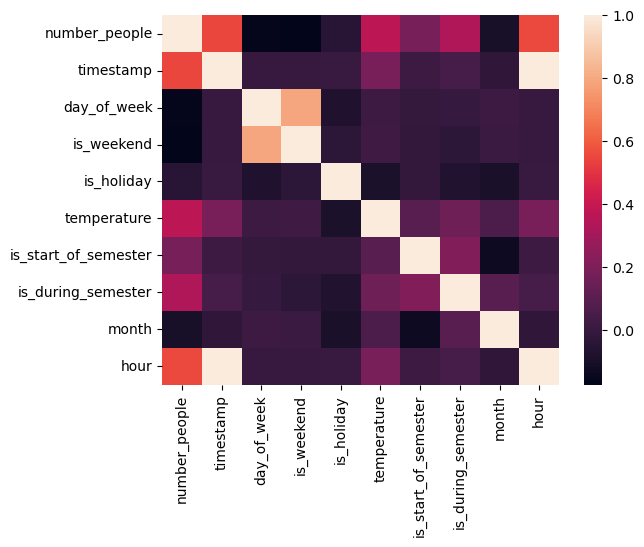

In [12]:
sns.heatmap(ds.corr())

<h3> After features are deduced, fit the model and start predictions </h3>

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [26]:
y = ds["number_people"]
X = ds[["hour","is_during_semester"]]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [31]:
clf = SGDClassifier(learning_rate='optimal', loss='huber', penalty='elasticnet',
             random_state=52)
clf.fit(X_train, y_train)
pred = clf.predict(X_train)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
# The mean squared error
print(f"Mean squared error: {round( mean_squared_error(y_train, pred),3)}")
# Explained variance score: 1 is perfect prediction
print(f"R2 score: {round(r2_score(y_train, pred),3)}")
# Mean Absolute Error
print(f"Mean absolute error: { round(mean_absolute_error(y_train, pred),3)}")


Mean squared error: 632.328
R2 score: -0.229
Mean absolute error: 20.425


<big>This project was made to grasp the stochastic gradient descent model, it is fitting since we are looking for the lowest number, either globally or locally.</big>